In [ ]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
%pip install ipympl
%matplotlib widget

# <center><u>Dynamics for encircling an exceptional point in a nonlinear non-Hermitian system</u></center>

### <center>Soham Sawant, Arjunn Pradeep, Archit Swamy, Harsh Pujare, K S Saketh</center>

## Abstract


This paper studies the dynamics near an exceptional point in a non linear non-Hermitian system consisting of a pair of resonators. One of the resonators has a linear loss, and the other resonator has a saturable gain. We show that the system dynamics exhibit chiral characteristics. And moreover, unique to the nonlinear system, such dynamics allow one to adiabatically switch between bistable states at the same system parameter. Such bistable switching is potentially interesting in optical memory based on coupled laser systems.


## 1. Introduction

Real physical systems often come with loss or gain as a result of
interactions with the environment. In quantum mechanics,
such systems are described by Hamiltonians that are necessarily
non-Hermitian to signify the breakdown of time reversibility.
They are characterised by the fact that the time evolution is not unitary, leading to a loss in probability.

The subset of such Non Hermitian systems that are Parity Time($\mathcal{PT}$) symmetric show interesting and sometimes counterintuitive phenomena as we vary the system parameters. Many of these phenomena are related to the existence of an exceptional point in the system parameter space.Exceptional points are the points in the system where both the eigenvalues and the eigenstates coalesce. This is different from normal degeneracy of the system where only the eigenvalues coalesce. At these points, we have an incomplete basis so our analysis has to be modified.

The dynamics near the exceptional point is of interest, particularly the observation that when an exceptional point is encircled sufficiently slowly in the parameter space, the state evolution is found to be topological and chiral; the final state depends on the direction in parameter space in which the exceptional point is encircled. This is attributed to the non-adiabatic transition of states when the trajectory encloses an exceptional point.

This paper studies a non-Hermitian system consisting of two resonators: one exhibits a linear loss, and the other exhibits nonlinear gain as described by a gain saturation model that is dependent on the fields's amplitude. Such a system can support steady states that oscillate in time without growth or decay, which are analogous to the eigenstates of the corresponding linear system. One can also define an exceptional point in this system to be the state where two steady states coalesce. The paper studies the dynamics, as the system parameters encircle such an exceptional point. Since practical gain media saturate as the signal
intensity reaches a certain value, including gain saturation in the study of non-Hermitian systems reflects a more realistic scenario.

## 2.The Model

The model consists of two resonant modes with resonant
frequencies $\omega_1$, $\omega_2$, nonlinear gain rate($g$) and loss rate($l$), and are coupled with coupling rate $\kappa$. The time evolution of the resonators’ amplitudes         $\Psi =(\psi_1, \psi_2)^{T}$ is governed  by the coupled-mode equation
with the following Hamiltonian

\begin{equation}
\mathcal{H} =
\begin{bmatrix}
    \omega_1 + ig & \kappa \\[10pt]
    \kappa & \omega_2-il  
    \tag{1}
\end{bmatrix}
\end{equation}

Here  $ \psi_1,\psi_2 $  represents the amplitudes of the two modes. The real parts of the eigenvalue $\lambda$ of the Hamiltonian are the oscillation frequencies, and the imaginary parts are the growth or decay rate of the corresponding eigenstates.

The schematic of the system is given below:


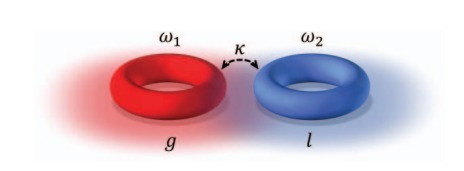

## 3. Linear Case

The paper briefly explains the linear case where both the gain rate($g$) and loss rate($l$) are taken to be a constant. For the parameters where  $\omega_2 = 2$ and $g$ =$l$=0.5, the eigenvalue equation is given by:

\begin{equation}
 \lambda = \frac{(4+\Delta\omega) \pm \sqrt{\Delta\omega^{2}+2i\Delta\omega+4\kappa^{2}-1}}{2}\
         (\Delta\omega=\omega_1-\omega_2)
  \tag{2}
 \end{equation}

The real and imaginary parts of the eigenvalue($\lambda$) are plotted below. The two eigenvalues are represented by red and blue respectively.

In this case, the real parts form a self intersecting Reimann surface as $\omega_1$ and $\kappa$ vary. The imaginary part signifies if its a gain (Im $\lambda > 0$) or loss (Im $\lambda < 0$). We can see that the gain or the loss of the eigenstate flips as you move across the ($\Delta\omega = \omega_1 - \omega_2 = 0$) line.

Along the  $\Delta\omega = 0$ line we observe that at $\kappa= l$ the eigenvalues go from real to imaginary as we decrease coupling which shows that the exceptional point is at $\kappa=l$ and $\Delta\omega=0$ as $\mathcal{PT}$ symmetry breaks at that point. The system is $\mathcal{PT}$ symmetric along the line $\omega_1=\omega_2$.



As we encircle the exceptional point, we can see that the state of the system does not
evolve in a fully adiabatic fashion and instead exhibits a chiral behavior. The quantum adiabatic theory says that if the system starts in an eigenstate of the initial Hamiltonian, it will end in the corresponding eigenstate of the final Hamiltonian, if a given perturbation is acting on it slowly enough, and if there is a gap between the eigenvalue and the rest of the Hamiltonian's spectrum. Here if we start at the higher frequency state (higher $\lambda$), the state evolves adiabatically under slow tuning of system parameters in the counterclockwise direction, but in the clockwise direction, it undergoes a non adiabatic transition due to the eigenstate being a state with loss; so if we go slowly, the current eigenstate decays and the system transistions to the eigenstate with gain. Thus, the final state of the system becomes encircling direction dependent. The behaviour is reversed if we start at the lower frequency state.


In [ ]:
#CODE FOR THE LINEAR CASE ; REAL AND IMAGINARY EIGENVALUE PLOTS IN PARAMETER SPACE

delta_w = np.linspace(-1, 1, 101)
k = np.linspace(0, 1, 101)
k, delta_w = np.meshgrid(k, delta_w)
values = np.zeros((len(delta_w), len(k), 2), dtype=complex)
values[:,:,0] = (4 + delta_w + np.sqrt(np.square(delta_w) + 2*complex(0,1)*delta_w + 4*np.square(k) - 1)) / 2
values[:,:,1] = (4 + delta_w - np.sqrt(np.square(delta_w) + 2*complex(0,1)*delta_w + 4*np.square(k) - 1)) / 2
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(k, delta_w, values.real[:,:,0], alpha=0.7, color='r')
ax.plot_surface(k, delta_w, values.real[:,:,1], alpha=0.7, color='b')
ax.title.set_text("Real(Eigenvalues)")
ax.set_xlabel("$\kappa$")
ax.set_ylabel("$\Delta\omega$")
ax.set_zlabel("Re($\Omega$)")
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(k, delta_w, values.imag[:,:,0], alpha=0.7, color='r')
ax.plot_surface(k, delta_w, values.imag[:,:,1], alpha=0.7, color='b')
ax.title.set_text("Imaginary(Eigenvalues)")
ax.set_xlabel("$\kappa$")
ax.set_ylabel("$\Delta\omega$")
ax.set_zlabel("Im($\Omega$)")

## 4. Non-Linear Case

Now, we take $g$ to be non-linear with the commonly used gain saturation model given by:
\begin{equation}
g=2\left(\frac{g_1+g_{10}}{1+A_1^{2}}\right) - g_{10}
  \tag{3}
\end{equation}

where $g_{10}$ represents the intrinsic loss rate and $g_1$ represents the overall gain rate at unit amplitude in $\psi_1$   and here
$A_1$ =$|\psi_1|$

This paper sets $g_{10} = 0.05$ and $g_1 = 0.5$ so that the maximum gain rate exceeds the gain rate of the linear
model.

The eigenvalue equation of the above Hamiltonian is given by:

\begin{equation}
(\omega_1-\lambda)(\omega_2-\lambda) + lg -\kappa^{2} + i[g(\omega_2-\lambda) - l(\omega_1-\lambda)]=0
  \tag{4}
\end{equation}


Now, allowing $g$ to be a free parameter and using the fact that the steady state solutions must have real eigenvalues, we equate the real and imaginary parts to zero in Eq.(4) and we get:

\begin{equation}
g(\omega_2-\lambda) - l(\omega_1-\lambda) = 0
\tag{5}
\end{equation}

 \begin{equation}
 (\omega_1-\lambda)(\omega_2-\lambda) + lg - \kappa_{2}=0
 \tag{6}
 \end{equation}

\begin{equation}
Eq.(5) \implies %gain equation
g= \frac{l(\omega_1-\lambda)}{(\omega_2-\lambda)}
\tag{7}
\end{equation}

provided $ (\omega_2\neq \lambda) $




Using Eq.(7) in Eq.(6), we get:

\begin{equation} (\omega_1-\lambda)(\omega_2-\lambda)^{2} + l^{2}(\omega_1-\lambda) - \kappa^{2}(\omega_2-\lambda)=0
\tag{8}
\end{equation}

Solutions to Eq.(8) are the steady state eigenvalues($\lambda$) to our Hamiltonian.

The eigenvalues for various values of $\kappa$ and $\Delta\omega$ are plotted below. The colours represent the stability of the states.

In [ ]:
import scipy
global w2, l, k, delta_w

w2 = 2
l = 0.5

k = np.linspace(0, 1.5, 201)
delta_w = np.linspace(-1, 1, 201)
k, delta_w = np.meshgrid(k, delta_w)
w1 = w2 + delta_w

values = np.zeros((len(delta_w), len(k), 3), dtype=complex)

for i in range(len(delta_w)):
    for m in range(len(k)):
        values[i,m] = np.roots([-1, 6+delta_w[i][0], k[0][m]*k[0][m]-12.25-4*delta_w[i][0], 8.5 + 0.25*delta_w[i][0] - 2*k[0][m]*k[0][m]])

def generate_stability_facecolors(values):
    global w2, l, k, delta_w

    lambda1 = values.real[:,:,0]
    lambda2 = values.real[:,:,1]
    lambda3 = values.real[:,:,2]

    g1 = 0.5
    g10 = 0.05

    a1_2 = np.zeros_like(values)
    a11 = (2*(g1 + g10) / (l + g10 + l*np.divide(delta_w, w2-lambda1))) - 1
    a12 = (2*(g1 + g10) / (l + g10 + l*np.divide(delta_w, w2-lambda2))) - 1
    a13 = (2*(g1 + g10) / (l + g10 + l*np.divide(delta_w, w2-lambda3))) - 1
    a1_2[:,:,0] = a11
    a1_2[:,:,1] = a12
    a1_2[:,:,2] = a13
    print(a1_2[a1_2 < 0])
    a1_2[np.isnan(a1_2.real)] = 0

    g_nl = np.zeros_like(values)
    g11 = (2*(g1+g10) / (1 + a11)) - g10
    g12 = (2*(g1+g10) / (1 + a12)) - g10
    g13 = (2*(g1+g10) / (1 + a13)) - g10
    g_nl[:,:,0] = g11
    g_nl[:,:,1] = g12
    g_nl[:,:,2] = g13
    g_nl[np.isnan(g_nl.real)] = 0

    B = np.zeros_like(values)
    B1 = - np.multiply(g11+g10, a11)
    B2 = - np.multiply(g12+g10, a12)
    B3 = - np.multiply(g13+g10, a13)
    B[:,:,0] = B1
    B[:,:,1] = B2
    B[:,:,2] = B3
    B[np.isnan(B.real)] = 0
    B_ = np.conj(B)

    A = np.zeros_like(values)
    A1 = B1 + g11 - complex(0,1)*w1
    A2 = B2 + g12 - complex(0,1)*w1
    A3 = B3 + g13 - complex(0,1)*w1
    A[:,:,0] = A1
    A[:,:,1] = A2
    A[:,:,2] = A3
    A[np.isnan(A.real)] = 0
    A_ = np.conj(A)
    # print(A[np.isnan(A)])

    # A = np.zeros_like(values)
    # B = np.zeros_like(values)

    # asq1 = np.abs((2*(g1+g10)/((l*np.divide((lambda1-w1), (lambda1-w2)))+g10))-1)
    # asq2 = np.abs((2*(g1+g10)/((l*np.divide((lambda2-w1), (lambda2-w2)))+g10))-1)
    # asq3 = np.abs((2*(g1+g10)/((l*np.divide((lambda3-w1), (lambda3-w2)))+g10))-1)
    # A1 = -np.divide(2*(g1+g10)*asq1, 1+asq1) + np.divide(2*(g1+g10), 1+asq1) - g10 - complex(0, 1)*w1
    # A2 = -np.divide((2*(g1+g10)*(asq2)), (1+ asq2)) + (np.divide(2*(g1+g10), (1+asq2))-g10) - complex(0, 1)*w1
    # A3 = -np.divide((2*(g1+g10)*(asq3)), (1+ asq3)) + (np.divide(2*(g1+g10), (1+asq3))-g10) - complex(0, 1)*w1
    # A[:,:,0] = A1
    # A[:,:,1] = A2
    # A[:,:,2] = A3
    # A[np.isnan(A.real)] = 0
    # A_ = np.conj(A)

    # B1 = -np.divide((2*(g1+g10)*(asq1)), (1+asq1))
    # B2 = -np.divide((2*(g1+g10)*(asq2)), (1+asq2))
    # B3 = -np.divide((2*(g1+g10)*(asq3)), (1+asq3))
    # B[:,:,0] = B1
    # B[:,:,1] = B2
    # B[:,:,2] = B3
    # B[np.isnan(B.real)] = 0
    # B_ = np.conj(B)

    C = -complex(0,1) * k
    C_ = np.conj(C)

    D = -complex(0,1)*w2 - l
    D_ = np.conj(D)

    stable = np.zeros_like(values)
    for i in range(len(delta_w)):
        for j in range(len(k)):
            if k[0][j] < 0.5:
                stable[i,j] = [False, False, False]
                continue
            for m in range(3):
                # mat = np.array([[A[i,j,m], B[i,j,m], C[0][j], 0],
                #                [np.conj(B[i,j,m]), np.conj(A[i,j,m]), 0, np.conj(C[0][j])],
                #                [C[0][j],0,D,0],
                #                [0, np.conj(C[0][j]), 0, np.conj(D)]])
                # w = scipy.linalg.eigvals(mat)
                w = np.roots([1, -(A[i,j,m]+A_[i,j,m]+D+D_), D*D_+A[i,j,m]*A_[i,j,m]+B[i,j,m]*B_[i,j,m]+(A[i,j,m]+A_[i,j,m])*(D+D_),
                              -((A[i,j,m]+A_[i,j,m])*D*D_+A[i,j,m]*A_[i,j,m]*(D+D_)-B[i,j,m]*B_[i,j,m]*(D+D_)-A_[i,j,m]*C[0,j]*C[0,j]),
                              A[i,j,m]*A_[i,j,m]*D*D_-B[i,j,m]*B_[i,j,m]*D*D_-A_[i,j,m]*D_*C[0,j]*C[0,j]])
                if np.all(w.real < 0):
                    stable[i,j,m] = True
                else:
                    stable[i,j,m] = False

    cmap = matplotlib.colors.ListedColormap(['r', 'b'])
    colors = cmap(values.real)

    for i in range(len(delta_w)):
        for j in range(len(k)):
            for m in range(3):
                if stable[i,j,m]:
                    colors[i,j,m] = [0,0,1,1]
                else:
                    colors[i,j,m] = [1,0,0,1]

    return colors

colors = generate_stability_facecolors(values)
colors_r = colors[:,:,0]
colors_r[abs(values.imag[:,:,0]) > 0.3, -1] = 0

colors_g = colors[:,:,1]
colors_g[abs(values.imag[:,:,1]) > 0.45, -1] = 0

colors_b = colors[:,:,2]
colors_b[abs(values.imag[:,:,2]) > 0.45, -1] = 0

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k, delta_w, values.real[:,:,0], facecolors=colors_r, shade=True)
ax.plot_surface(k, delta_w, values.real[:,:,1], facecolors=colors_g, shade=True)
ax.plot_surface(k, delta_w, values.real[:,:,2], facecolors=colors_b, shade=True)
ax.view_init(45,15,0)
ax.set_xlabel("$\kappa$")
ax.set_ylabel("$\Delta\omega$")
ax.set_zlabel("Re($\Omega$)")

We can see that as we go from weak coupling to strong coupling, the number of steady states increases from one upto three.

Along the $\Delta\omega$  = 0 line, $\omega_1 = \omega_2 = \omega$, from Eq.(7), we get $g=l$ unless $\lambda=\omega$.

In this case Eq.(6) reduces to
\begin{equation} (\omega-\lambda)^{2}+l^{2} - \kappa^{2}=0
\tag{9}
\end{equation}

\begin{equation} \lambda=\omega \pm \sqrt{\kappa^{2}-l^{2}}
\tag{10}
\end{equation}


These solutions only exist in the strong coupling region where $\kappa > l$ since eigenvalues have to be real. This means only one solution ($\lambda = \omega$) exists in the weak coupling regime where $\kappa < l$.

The $\kappa = l$ and $\Delta\omega = 0$ point is the exceptional point in our system. The exceptional point has the same position in the parameter space as the linear case.


## 5. Stability Analysis
Now to find the stability of the steady states, we look at the lyapunov exponent between the state and a perturbed state.
The time evolution of the steady state is given by
\begin{equation} i\frac{\partial \Psi}{\partial t}=\mathcal{H} \Psi
\tag{11}
\end{equation}

Here $\mathcal{H}$ and $\Psi$ are the unperturbed.

When we apply a small perturbation, the new state $\Psi^{'} = \Psi + \rho$ where $\rho = [\rho_1, \rho_2]^T$

The first term in the hamiltonian also gets perturbed as it is dependent on the state. The new value of gain is given by:

\begin{equation} g' = \frac{2(g_1+g_{10})}{1+(\psi_1+\rho_1)(\psi^*_1+\rho_1^*)} - g_{10}
\tag{12}
\end{equation}

Taking up to first order and assuming the perturbation is very small, we get:
\begin{equation} g' = g - \frac{2(g_1+g_{10})}{1+|\psi_1|^2}(\rho_1\psi_1^*+\psi_1\rho_1^*)
\tag{13}
\end{equation}


Now using this value of g in the hamiltonian, and using Eq.(11), we get

\begin{equation} \dot{\rho_1} = A\rho_1 + B\rho_1^* + C\rho_2
\tag{14}
\end{equation}

\begin{equation} \dot{\rho_1^*} = A^*\rho_1^* + B^*\rho_1 + C^*\rho_2^{*}
\tag{15}
\end{equation}

\begin{equation} \dot{\rho_2} = C\rho_1 + D\rho_2
\tag{16}
\end{equation}

\begin{equation} \dot{\rho_2^*} = C^*\rho_1^* + D^*\rho_2^*
\tag{17}
\end{equation}

Where A,B,C,D are defined as:

\begin{equation} 
A = -(g+g_{10})|\psi_1|^2+g-iw_1
    \tag{18}
\end{equation}

\begin{equation} 
    B = -(g+g_{10})|\psi_1|^{2}
    \tag{19}
\end{equation}

\begin{equation} 
    C = -ik
    \tag{20}
\end{equation}

\begin{equation} 
    D = -iw_2-l
    \tag{21}
\end{equation}

A, B, C, D can be solved for a given $\lambda$ using Eq.(44) derived later.

So in matrix form, the equations are:

\begin{equation}

\begin{bmatrix}
   \dot{\rho_1} \\
   \dot{\rho_1^{*}}\\
   \dot{\rho_2}\\
   \dot{\rho_2^{*}}\\
\end{bmatrix}

=

\begin{bmatrix}
    A & B & C & 0 \\
    B^{*} & A ^{*} & 0 & C^{*}\\
    C & 0 & D & 0 \\
    0 & C^{*} & 0 & D^{*} \\
\end{bmatrix}

\begin{bmatrix}
   \rho_1 \\
   \rho_1^{*}\\
   \rho_2\\
   \rho_2^{*}\\
\end{bmatrix}  
    \tag{22}

\end{equation}

For the steady state to be stable, all the perturbations must die out which implies that the real part of all four eigenvalues of the above matrix  should be negative.

 The stable states are coloured red and the unstable states are coloured blue in the cubic equation plot. Here we have the code for computing the eigenvalues of this matrix for a given value of $\lambda$.

In [ ]:
import numpy as np
lam= 3.60407438
omega1 = 2.25
k=1.5
omega2=2
l = 0.5
a1 = np.sqrt((1.1/((l*(lam-omega1)/(lam-omega2))+0.05))-1)
asq = np.abs((1.1/((l*(lam-omega1)/(lam-omega2))+0.05))-1)
a = -((1.1*(asq))/(1+ asq)) + ((1.1/(1+asq))-0.05) - complex(0, omega1)
b = -((1.1*(asq))/(1+asq))
c = -complex(0, k)
d = -complex(l, omega2)
matrix = np.array([[a, b, c, 0],
                  [np.conj(b), np.conj(a), 0, np.conj(c)],
                  [c, 0, d, 0],
                  [0, np.conj(c), 0, np.conj(d)]])
eigenvalues = np.linalg.eigvals(matrix)
print("Eigenvalues of the complex matrix:")
print(eigenvalues)

From the stability analysis, we find that up to two stable steady states out of a maximum number of three steady states are possible in the strong coupling regime.

## 6. Time evolution of a General State

The evolution is governed by the Schrodinger equation given below:  

\begin{equation}

i

\begin{bmatrix}
\frac{\partial \psi_1}{\partial t} \\[10pt]
\frac{\partial \psi_2}{\partial t} \\
\end{bmatrix}

=

\begin{bmatrix}
    \omega_1 + ig & \kappa \\[10pt]
    \kappa & \omega_2-il  
\end{bmatrix}

\begin{bmatrix}

 \psi_1\\[10pt]
\psi_2\\

\end{bmatrix}

    \tag{23}

\end{equation}

Here  each state $\psi_j$ is split into the real part $A_j$ and phase $\phi_j$ for j=1,2

\begin{equation}
\psi_j = A_je^{i\phi_j}
    \tag{24}
\end{equation}

Taking time derivative of Eq.(24) and multiplying by i, we get:

\begin{equation}
i\frac{\partial \psi_1}{\partial t}=i\frac{\partial A_1}{\partial t}e^{i\phi_1} - \frac{\partial \phi_1}{\partial t}A_1e^{i\phi_1}
    \tag{25}
\end{equation}

\begin{equation}
i\frac{\partial \psi_2}{\partial t}=i\frac{\partial A_2}{\partial t}e^{i\phi_2} -\frac{\partial A_2}{\partial t}A_2e^{i\phi_2}
    \tag{26}
\end{equation}

Substituting back in Eq.(23), we have:

\begin{equation}
i\frac{\partial A_1}{\partial t} -\frac{\partial \phi_1}{\partial t}A_1 =
\omega_1A_1 + igA_1 + \kappa A_2e^{-i \Delta\phi}
    \tag{27}
\end{equation}

where we define $\Delta\phi$ to be

\begin{equation}
\Delta\phi =\phi_1 - \phi_2  
    \tag{28}
\end{equation}

Now once we separate the real and imaginary parts of Eq.(27) we get:

\begin{equation}
\frac{\partial A_1}{\partial t}=\left(2\left(\frac{g_1+g_{10}}{1+A_1^{2}}\right) - g_{10}\right)A_1
-\kappa A_2sin\Delta\phi
\tag{29}
\end{equation}

\begin{equation}
\frac{\partial \phi_1}{\partial t}= -\omega_1 -\kappa\frac{A_2}{A_1}cos\Delta\phi
\tag{30}
\end{equation}

Similarly using the same method for $A_2$ we get :

\begin{equation}
\frac{\partial A_2}{\partial t}= -lA_2 +\kappa A_1 sin\Delta\phi
\tag{31}
\end{equation}

\begin{equation}
\frac{\partial \phi_2}{\partial t}= -\omega_2 - \kappa\frac{A_1}{A_2}cos\Delta\phi
\tag{32}
\end{equation}

Now subtracting equation(30) from equation (32) we get :

\begin{equation}
\frac{\partial\Delta \phi}{\partial t}= - \Delta\omega +\kappa cos\Delta\phi\left(\frac{A_1^{2}-A_2^{2}}{A_1A_2}\right)
\tag{33}
\end{equation}

## 7. Relations in the steady state

In the steady state we have:

\begin{equation}
\psi_1 (t) = \psi_1(0)e^{-i\lambda t}
    \tag{34}
\end{equation}

\begin{equation}
\psi_2 (t) = \psi_2(0)e^{-i\lambda t}
    \tag{35}
\end{equation}

\begin{equation}
\frac{\partial A_1}{\partial t}  = 0
\tag{36}
\end{equation}

\begin{equation}
\frac{\partial A_2}{\partial t}  =0
    \tag{37}
\end{equation}

\begin{equation}
\frac{\partial \phi_1}{\partial t}= -\lambda
    \tag{38}
\end{equation}

\begin{equation}
\frac{\partial \phi_2}{\partial t}=- \lambda
    \tag{39}
\end{equation}

\begin{equation}
\frac{\partial \Delta \phi}{\partial t} = 0
    \tag{40}
\end{equation}


Substituting in Eq.(29)and Eq.(31) we get:

\begin{equation}
gA_1=\kappa A_2 sin\Delta \phi
    \tag{41}
\end{equation}

\begin{equation}
lA_2 = \kappa A_1sin\Delta\phi    
    \tag{42}
\end{equation}

Using Eq.(41) and Eq.(42)

\begin{equation}
\frac{g}{l}=\frac{A_2^{2}}{A_1^{1}}=\frac{\omega_1- \lambda}{\omega_2-\lambda}
    \tag{43}
\end{equation}


We substitute the value of $g$ from Eq.(3) in this equation and get:

\begin{equation}
A_1^{2} =\frac{2(g_1+g_{10})}{(l+g_{10}) + \frac{l\Delta\omega}{\omega_2-\lambda} }  - 1
    \tag{44}
\end{equation}

From this equation, we can derive the gain saturation amplitude for a given value of $\lambda$

To solve for $\Delta\phi$, from Eq.(42) and Eq.(43), we get:

\begin{equation}
\frac{lA_2}{\kappa A_1}    = sin\Delta \phi
    \tag{45}
\end{equation}

Using equation(43) we get :

\begin{equation}
sin\Delta \phi  =\frac{l}{\kappa}\sqrt{1+\frac{\Delta \omega}{\omega_2 - \lambda}}
        \tag{46}
\end{equation}

## 8. Similarities and differences with the linear case

The stability analysis and the shape of the Reimann curve is similar to the one in the linear case. However there is a major difference in the fact that In the linear model, for any given parameters of detuning $\Delta\omega$ and coupling constant $\kappa$, there is only one state with gain. In contrast, for the nonlinear model, there is a parameter region for which the
system can support two stable states and become bistable.

Both the similarity and the difference in the eigenvalue surface of the linear model and the steady-state frequency surface of the nonlinear model should also manifest in the properties of adiabatic dynamics in the two models. From the similarities, we expect that the chiral properties of the linear system should persist. However, in the non-linear model,
the adiabatic dynamics can in addition provide a switching mechanism
between the bistable states. This is a unique aspect of the nonlinear model that is not shared by its linear counterpart.

## 9. Time domain simulation

Now we encircle the exceptional point about $\Delta\omega=0$ and $\kappa=l$ with a sufficiently large time period to ensure adiabaticity in the dynamics. The parameters $\kappa$ and $\Delta\omega$ are time dependent, and their trajectories trace out a circle in the$\kappa$ - $\Delta\omega$ space. The  Total time ($T_{total}$) = 3200, Radius of encirclement($R$) = 0.4 is chosen and the solutions with starting condition $A_1 = A_2 = 1$,  $\Delta\phi = 0.25\pi$,
$\kappa$= 0.9, and $\Delta\omega$, which is the higher frequency stable state, is plotted.

 In the counterclockwise direction we have:

\begin{equation}
\Delta \omega = Rsin\left(\frac{2\pi t}{T_{total}}\right)
       \tag{47}
\end{equation}

\begin{equation}
\kappa=l + Rcos\left(\frac{2\pi t}{T_{total}}\right)
       \tag{48}
\end{equation}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import cos,sin,pi
g1 = 0.5
g10 = 0.05
l = 0.5
omega2 = 2
def equations(y, t):
    y1,y2,y3 = y
    dy1dt = ((2 * (g1 + g10) / (1 + y1**2)) - g10) * y1 -  (l + 0.4*cos(2*pi*t/3200)) * y2 * sin(y3)
    dy2dt = -l*y2 + (l +  0.4*cos(2*pi*t/3200))*y1*sin(y3)
    dy3dt = -(0.4*sin(2*pi*t/3200)) + (l + 0.4*cos(2*pi*t/3200))*(((y1**2)-(y2**2))/y1*y2)*cos(y3)
    return [dy1dt, dy2dt, dy3dt]
y0 = [1.0, 1.0, 0.25]
t = np.linspace(0, 3200, 6400)
result = odeint(equations, y0, t)
y1_solution, y2_solution, y3_solution = result.T
y3_mod_pi = (y3_solution%(pi))/pi
mod_y2 = np.abs(y2_solution)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(t, y1_solution, label='A1')
plt.plot(t, mod_y2, label='A2')
plt.plot(t, y3_mod_pi, label='ph1-phi2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

and in the clockwise direction we have:

\begin{equation}
\Delta \omega =- Rsin\left(\frac{2\pi t}{T_{total}}\right)
       \tag{49}
\end{equation}

\begin{equation}
\kappa=l + Rcos\left(\frac{2\pi t}{T_{total}}\right)
       \tag{50}
\end{equation}


In [ ]:
import numpy as np
from scipy.integrate import odeint
from math import cos,sin,pi
g1 = 0.5
g10 = 0.05
l = 0.5
omega2 = 2
def equations(y, t):
    y1,y2,y3 = y
    dy1dt = ((2 * (g1 + g10) / (1 + y1**2)) - g10) * y1 -  (l + 0.4*cos(2*pi*t/3200)) * y2 * sin(y3)
    dy2dt = -l*y2 + (l +  0.4*cos(2*pi*t/3200))*y1*sin(y3)
    dy3dt = (0.4*sin(2*pi*t/3200)) + (l + 0.4*cos(2*pi*t/3200))*(((y1**2)-(y2**2))/y1*y2)*cos(y3)
    return [dy1dt, dy2dt, dy3dt]
y0 = [1.0, 1.0, 0.2*pi]
t = np.linspace(0, 3200, 6400)
result = odeint(equations, y0, t)
y1_solution, y2_solution, y3_solution = result.T
y3_mod_pi = (y3_solution%(pi))/pi
mod_y2 = np.abs(y2_solution)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(t, y1_solution, label='A1')
plt.plot(t, mod_y2, label='A2')
plt.plot(t, y3_mod_pi, label='ph1-phi2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


For the loop in the counterclockwise direction, the state stays
on the stable steady-state surface at all times, evolving adiabatically to the lower frequency state. There is an overall gain in the phase factor after encirclement, In contrast, for the loop in the clockwise direction, the state experiences a nonadiabatic transition as it enters the unstable region and evolves to the same state from where it starts. This behavior is also shown in as a transition in amplitude and phase around t = 300. The situation is reversed when the initial state is set to the lower frequency one. The observed chiral dependence results from the change of the stability of the instantaneous steady states in our nonlinear model.

## 10. Hysteresis

To illustrate the process of bistable switching, we perform a time-domain simulation by fixing the coupling rate $\kappa = 0.85$, and varying the detuning $\Delta\omega$ starting from $\Delta\omega = -0.45$, going through the bistable region, to $\Delta\omega = 0.45$, and back to the starting value with a constant rate and total cycle time of $T = 51200$. The cycle time is chosen to both ensure the adiabaticity and to capture the effect of stability along the path. Here, the phase difference between the two amplitudes $\psi_{1,2}$ at any given time serves as an indicator for the state the system is in at that time, with the higher frequency state having a smaller absolute phase difference as shown in Eq.(46). In the first half during which the detuning is increased from -0.45 to 0.45, the system stays in the lower frequency state for the entire bistability region, and switches to the higher  frequency when the state becomes unstable just outside the bistable region. The situation is reversed on the backwards trajectory.
Thus, the system exhibits a typical hysteresis behavior. This result is closely related to the bistability observed. The plot for the hysteris is given below. The blue represents the forward direction and the red represents the backward direction.

In [ ]:
# Hysterisis plot
w2 = 2
l = 0.5

k = np.linspace(0, 2, 201)
delta_w = np.linspace(-1, 1, 201)
k, delta_w = np.meshgrid(k, delta_w)
w1 = w2 + delta_w

values = np.zeros((len(delta_w), len(k), 3), dtype=complex)

for i in range(len(delta_w)):
    for m in range(len(k)):
        values[i,m] = np.roots([-1, 6+delta_w[i][0], k[0][m]*k[0][m]-12.25-4*delta_w[i][0], 8.5 + 0.25*delta_w[i][0] - 2*k[0][m]*k[0][m]])

values[values.imag != 0] = 0
values = values.real

k_idx = 100
k0 = k[0][k_idx]
print(k0)
del_phi_forward = np.zeros((len(delta_w), 1))
del_phi_backward = np.zeros((len(delta_w), 1))

curr_idx = 0
for i in range(len(delta_w)):
    if np.all(colors[i][k_idx][curr_idx] == [0,0,1,1]):
        curr_idx = 2 - curr_idx
    del_phi_backward[i] = math.degrees(math.asin(l/k0 * (math.sqrt(1 + delta_w[i][0]/(w2 - values[i][k_idx][curr_idx])))))

for i in range(len(delta_w)):
    j = len(delta_w) - 1 - i
    if np.all(colors[j][k_idx][curr_idx] == [0,0,1,1]):
        curr_idx = 2 - curr_idx
    del_phi_forward[j] = math.degrees(math.asin(l/k0 * (math.sqrt(1 + delta_w[j][0]/(w2 - values[j][k_idx][curr_idx])))))

a2a1 = np.zeros((len(delta_w), 2))
a2a1[:,0] = np.divide(w1[:,0] - values[:,k_idx][:,0], w2 - values[:,k_idx][:,0])
a2a1[:,1] = np.divide(w1[:,0] - values[:,k_idx][:,2], w2 - values[:,k_idx][:,2])

turn0 = np.where(values[:,k_idx][:,0] == 0)[0][0]
turn2 = np.where(values[:,k_idx][:,2] == 0)[0][-1]

del_phi_forward = np.zeros((len(delta_w), 1))
del_phi_backward = np.zeros((len(delta_w), 1))
for i in range(len(delta_w)):
    if i < turn0:
        del_phi_forward[i] = math.degrees(math.acos(np.clip(delta_w[i][0]/(k0 * (-a2a1[i][0] + 1/a2a1[i][0])), -1, 1)))
    else:
        del_phi_forward[i] = math.degrees(math.acos(np.clip(delta_w[i][0]/(k0 * (-a2a1[i][1] + 1/a2a1[i][1])), -1, 1)))

for i in range(len(delta_w)):
    j = len(delta_w) - 1 - i
    if j > turn2:
        del_phi_backward[j] = math.degrees(math.acos(np.clip(delta_w[j][0]/(k0 * (-a2a1[j][1] + 1/a2a1[j][1])), -1, 1)))
    else:
        del_phi_backward[j] = math.degrees(math.acos(np.clip(delta_w[j][0]/(k0 * (-a2a1[j][0] + 1/a2a1[j][0])), -1, 1)))

del_phi_forward[np.where(np.isnan(del_phi_forward))[0][0]] = (del_phi_forward[np.where(np.isnan(del_phi_forward))[0][0]+1] + del_phi_forward[np.where(np.isnan(del_phi_forward))[0][0]-1]) / 2
del_phi_backward[np.where(np.isnan(del_phi_backward))[0][-1]] = (del_phi_backward[np.where(np.isnan(del_phi_backward))[0][-1]+1] + del_phi_backward[np.where(np.isnan(del_phi_backward))[0][-1]-1]) / 2

plt.figure()
plt.plot(delta_w[45:145,0], del_phi_forward[45:145], 'b')
plt.plot(delta_w[45:145,0], del_phi_backward[45:145], 'r')
plt.xlabel("$\Delta\omega$")
plt.ylabel("$\Delta\phi$")

## 11. Applications

The analysis on the chiral state transfer provides a novel way of switching between the stable steady states. The gain model in Eq.(3) can describe the gain of a laser medium, and a stable steady state then corresponds to a lasing state. Typically, when there are multiple possible lasing states, the standard laser model favors the state with the lowest gain threshold as it is able to grow faster to dominate others by saturating out the shared gain, making other states not directly accessible. In our setup, because of the bistability, the lasing state with the higher gain threshold in fact can be accessed via adiabatic parameter tuning in our model. For a starting point inside the bistable region at $\kappa = 0.87$ and $\Delta\omega = -0.15$, we see that the lower frequency state has a lower gain threshold. Starting from this state, an adiabatic parameter encirclement around the exceptional point in the clockwise direction brings the system to the higher frequency stable state at the same parameters, but with a higher gain threshold. The adiabatic process thus provides access to the higher frequency stable states, which have a higher threshold.

Previously, bistable switching in lasers has been explored as a
way to achieve an optical flip-flop switch or optical memory. In the previous works, the switching usually relies upon varying the spatial profile of the gain distribution in order to alter the gain to different modes. This paper provides a novel mechanism to achieve such switching. In our system, the two bistable lasing modes can have different output beam profiles, due to the difference in phase distributions as mentioned above. These
characteristics may be useful in separating the output field corresponding to the two different states of a memory device.


## 12. Future Scope
This work focuses on the effect of gain saturation nonlinearity on the adiabatic dynamics, the results indicate that it should be of interest to study adiabatic dynamics in the presence of other types of nonlinearity, such as intensity-dependent refractive index, or more complex nonlinearities described by coupled electronic and photonic degrees of freedom.
It should also be interesting to study similar dynamics near an exceptional point with nonzero detuning and in systems with no $\mathcal{PT}$ symmetry.

## 13. References
For features of exceptional points and $\mathcal{PT}$ symmetry breaking -
1.  A. Guo, G. J. Salamo, D. Duchesne, R. Morandotti, M. Volatier-Ravat,
    V. Aimez, G. A. Siviloglou, and D. N. Christodoulides, Phys. Rev. Lett.
    103, 093902 (2009)
2.   R. El-Ganainy, K. G. Makris, M. Khajavikhan, Z. H. Musslimani S.
Rotter, and D. N. Christodoulides, Nat. Phys. 14, 11 (2018).

To calculate the steady state eigenvalues of the non linear case

3. S. Assawaworrarit, X. Yu, and S. Fan, Nature 546, 387 (2017).

To calculate lyapunov exponents for stability

4. X. Zhou and Y. D. Chong, Opt. Express 24, 6916 (2016)

